<a href="https://colab.research.google.com/github/AI-ClassWork/Tensorflow_Fundamentals/blob/main/03_Introduction_to_Convolutional_Neural_Networks_and_Computer_Vision_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer Vision is the practice of writing algorithms which can discover patterns in visual data such as the camera of a self-driving car recognizing the car in front.



## Get the data

The images we're working with are from the Food101 dataset(101 different classes of food)

However we've modified it to only use two classes(pizza and steak) https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

**Note:** We start with a maller dataset so we can experiment quickly and figure out what works(or better yet what doesn't work) before scaling up



In [ ]:
import zipfile 

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref=zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()


--2022-03-15 18:27:10--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.140.128, 108.177.15.128, 173.194.76.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.140.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  41.5MB/s    in 2.5s    

2022-03-15 18:27:14 (41.5 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very cruical step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project...this usually means visualizing many samples of data

In [ ]:
!ls pizza_steak


test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

# Walk through the pizza_steak directory and list no. of files

for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are: {len(dirnames) } directories and {len(filenames)} images in '{dirpath}'." )

There are: 2 directories and 0 images in 'pizza_steak'.
There are: 2 directories and 0 images in 'pizza_steak/test'.
There are: 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are: 0 directories and 250 images in 'pizza_steak/test/steak'.
There are: 2 directories and 0 images in 'pizza_steak/train'.
There are: 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are: 0 directories and 750 images in 'pizza_steak/train/steak'.


In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train=len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualise our images first let's get the class names programmatically

In [ ]:
# Get the classnames programmatically

import pathlib
import numpy as np
data_dir=pathlib.Path("pizza_steak/train")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")])) # Create a list of classnames from the names of the sub directories
print(class_names)


['pizza' 'steak']


In [ ]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  #Setup the target directory (we'll view images from here)
  target_folder=target_dir+target_class

  #Get the random image path
  random_image=random.sample(os.listdir(target_folder),1)
  print(random_image)
  
  #Read the image and plot using matplitlib
  img=mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")# show the  shape of the image

  return img





['54540.jpg']
Image shape: (512, 384, 3)


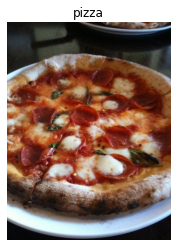

In [ ]:
#View the random image from the training dataset
img=view_random_image(target_dir="pizza_steak/train/",
                      target_class="pizza")

In [ ]:
import tensorflow as tf


In [ ]:
# The images we've imported and plotted are actually giant arrays/tensors of different pixel values
tf.constant(img)

<tf.Tensor: shape=(512, 384, 3), dtype=uint8, numpy=
array([[[15, 15, 23],
        [14, 14, 22],
        [14, 14, 22],
        ...,
        [34, 30, 27],
        [26, 25, 21],
        [23, 22, 18]],

       [[15, 15, 23],
        [14, 14, 22],
        [14, 14, 22],
        ...,
        [30, 25, 19],
        [23, 18, 12],
        [18, 15,  8]],

       [[16, 16, 24],
        [16, 17, 22],
        [16, 17, 22],
        ...,
        [31, 21, 12],
        [25, 16,  7],
        [22, 13,  4]],

       ...,

       [[ 5,  6,  8],
        [ 5,  6,  8],
        [ 5,  6,  8],
        ...,
        [16, 11,  8],
        [15, 10,  7],
        [15, 10,  7]],

       [[ 4,  5,  7],
        [ 4,  5,  7],
        [ 4,  5,  7],
        ...,
        [17, 12,  9],
        [17, 12,  9],
        [17, 12,  9]],

       [[ 4,  5,  7],
        [ 4,  5,  7],
        [ 4,  5,  7],
        ...,
        [17, 12,  9],
        [18, 13, 10],
        [18, 13, 10]]], dtype=uint8)>

In [ ]:
# View the image shape
img.shape #Returns width, height,color channels

(512, 384, 3)

As discussed before, many machine learning models, including neural networks prefer the values they worko with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to scale(also referred to as normalize) their pixel values by dividing the image arrays by 255(since 255 is the maximum pixel value)

In [ ]:
# Get all the pizel values between 0 and 1
img/255

array([[[0.05882353, 0.05882353, 0.09019608],
        [0.05490196, 0.05490196, 0.08627451],
        [0.05490196, 0.05490196, 0.08627451],
        ...,
        [0.13333333, 0.11764706, 0.10588235],
        [0.10196078, 0.09803922, 0.08235294],
        [0.09019608, 0.08627451, 0.07058824]],

       [[0.05882353, 0.05882353, 0.09019608],
        [0.05490196, 0.05490196, 0.08627451],
        [0.05490196, 0.05490196, 0.08627451],
        ...,
        [0.11764706, 0.09803922, 0.0745098 ],
        [0.09019608, 0.07058824, 0.04705882],
        [0.07058824, 0.05882353, 0.03137255]],

       [[0.0627451 , 0.0627451 , 0.09411765],
        [0.0627451 , 0.06666667, 0.08627451],
        [0.0627451 , 0.06666667, 0.08627451],
        ...,
        [0.12156863, 0.08235294, 0.04705882],
        [0.09803922, 0.0627451 , 0.02745098],
        [0.08627451, 0.05098039, 0.01568627]],

       ...,

       [[0.01960784, 0.02352941, 0.03137255],
        [0.01960784, 0.02352941, 0.03137255],
        [0.01960784, 0

## An end-end example

Let's build a CNN to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our images
* Fit the CNN to our data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

#Preprocess data(get all the pixel values between 0 and 1, also called scaling/normalization)
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

#Setup paths to our data directories
train_dir="/content/pizza_steak/train"
test_dir="pizza_steak/test"

#Import data from directories and turn it into batches
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)
valid_data=valid_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)     


# Build a CNN model (Same as the Tiny VGG on the CNN explainer website)
model_1=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])       

#Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
#Fit the model
history_1=model_1.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 31s 347ms/step - loss: 0.5310 - accuracy: 0.7253 - val_loss: 0.3933 - val_accuracy: 0.8100
Epoch 2/5
47/47 [==============================] - 11s 232ms/step - loss: 0.4309 - accuracy: 0.8013 - val_loss: 0.3587 - val_accuracy: 0.8540
Epoch 3/5
47/47 [==============================] - 11s 232ms/step - loss: 0.3956 - accuracy: 0.8333 - val_loss: 0.3263 - val_accuracy: 0.8780
Epoch 4/5
47/47 [==============================] - 11s 232ms/step - loss: 0.3574 - accuracy: 0.8513 - val_loss: 0.3039 - val_accuracy: 0.8840
Epoch 5/5
47/47 [==============================] - 12s 245ms/step - loss: 0.3243 - accuracy: 0.8633 - val_loss: 0.2831 - val_accuracy: 0.8900


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 93s 2s/step - loss: 0.5462

**Note** If the above cell is taking longer than 10 seconds per epoch, use a gpu by going to Runtime->Change runtime type

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Using the same model as before 

Let's replicate the model we've built in a previous section to see if it works with our image data.

The model we're building is from the TensorFlow playground

In [ ]:
# Set random seed
tf.random.set_seed(42)

#Create a model to replicate the Tensorflow Playground model
model_2=tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape=(224,224,3)),
          tf.keras.layers.Dense(4,activation="relu"),
          tf.keras.layers.Dense(4,activation="relu"),
          tf.keras.layers.Dense(1,activation="sigmoid")                  
])

#Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model
history_2=model_2.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 212ms/step - loss: 1.9709 - accuracy: 0.4980 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 206ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 208ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 216ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 206ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
# Geta summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20 times more parameters than our CNN model, it still performs terribly. Let's try to improve it

In [ ]:
# Set random seed
tf.random.set_seed(42)

#Create a model to replicate the Tensorflow Playground model( Same as above but let's step it up a notch)
model_3=tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape=(224,224,3)),
          tf.keras.layers.Dense(100,activation="relu"),
          tf.keras.layers.Dense(100,activation="relu"),
          tf.keras.layers.Dense(100,activation="relu"),
          tf.keras.layers.Dense(1,activation="sigmoid")                  
])

#Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model
history_3=model_3.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 216ms/step - loss: 3.8139 - accuracy: 0.5940 - val_loss: 1.0952 - val_accuracy: 0.7180
Epoch 2/5
47/47 [==============================] - 10s 209ms/step - loss: 0.8654 - accuracy: 0.7073 - val_loss: 0.4630 - val_accuracy: 0.7840
Epoch 3/5
47/47 [==============================] - 10s 210ms/step - loss: 0.9083 - accuracy: 0.6880 - val_loss: 0.6513 - val_accuracy: 0.7700
Epoch 4/5
47/47 [==============================] - 10s 210ms/step - loss: 0.6805 - accuracy: 0.7527 - val_loss: 0.5005 - val_accuracy: 0.7840
Epoch 5/5
47/47 [==============================] - 10s 208ms/step - loss: 0.5287 - accuracy: 0.7793 - val_loss: 0.4766 - val_accuracy: 0.7840


In [ ]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Binary Classification: Let's break it down

1. Become one with the data (visualize,visualize,visulaize)
2. Preprocess the data ( prepared it for our model, the main step here was scaling/normalizing and turn our data into batches)
3. Created a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model(try to beat the baseline)
7. Repeat until satisfied

###1.Become one with the data

['2988960.jpg']
Image shape: (512, 512, 3)
['517902.jpg']
Image shape: (341, 512, 3)


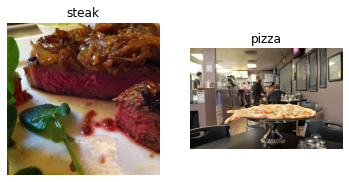

In [ ]:
# Visualize data
plt.figure()
plt.subplot(1,2,1)
steak_img=view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img=view_random_image("pizza_steak/train/","pizza")

### 2.Preprocess the data(prepare it for a model)

In [ ]:
# Define directory dataset paths
train_dir="pizza_steak/train/"
test_dir="pizza_steak/test/"


Our next step is to turn our data into **batches**
A batch is a small subset of data. Rather than look at all images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. All images might not fit into the memory of your preprocessor(GPU)
2. Trying to learn the patterns in all images in one hit could result in the model not being able to learn well.

32 is optimum.


In [ ]:
#Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
#Load in our image data from our directories and turn them into batches
train_data=train_datagen.flow_from_directory( 
    directory=train_dir, # Target directory of images
    target_size=(224,224),#  target size of images(height,width)
    class_mode="binary", # type of data you're working with
    batch_size=32 # Size of mini-batches to load data into
)
test_data=test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(224,224),
    class_mode="binary",
    batch_size=32
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
#Get a sample of training images
images,labels=train_data.next() #get the "next" batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [ ]:
# How many batches are there?
len(train_data)

47

In [ ]:
1500/32

46.875

In [ ]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [ ]:
images[7].shape

(224, 224, 3)

In [ ]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3.Create a CNN model(start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you try experimenting, you try to beat the baseline

**Note**: In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field of your problem)

In [ ]:
# Make the creating of our model a little easier

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras import Sequential

In [ ]:
# Create the model(this will be our baseline, a layer convolutional neural network)
model_4=Sequential([
                    Conv2D(filters=10, # No. of sliding windows going across an input(Higher=more complex model)
                           kernel_size=3,# The size of the sliding window
                           strides=1, # the size of the step the sliding window takes across an input
                           padding="valid", #if same, ouput shape is same as input shape. if "valid", ouput shape gets compressed
                           activation="relu",
                           input_shape=(224,224,3)), #input layer(specify input shape)
                    Conv2D(10,3,activation="relu"),
                    Conv2D(10,3,activation="relu"),
                    Flatten(),
                    Dense(1,activation="sigmoid") # Output layer (working with binary classification)
])

In [ ]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


###4.Fitting the model

In [ ]:
#Check the lengths of the training and test data generators
len(train_data),len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_4=model_4.fit(
    train_data, # Combination of X and Y(labels and sample data)
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 13s 253ms/step - loss: 1.6823 - accuracy: 0.5547 - val_loss: 0.5663 - val_accuracy: 0.7700
Epoch 2/5
47/47 [==============================] - 11s 242ms/step - loss: 0.5262 - accuracy: 0.7720 - val_loss: 0.4524 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 11s 243ms/step - loss: 0.3960 - accuracy: 0.8320 - val_loss: 0.3482 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 12s 253ms/step - loss: 0.3170 - accuracy: 0.8700 - val_loss: 0.3355 - val_accuracy: 0.8740
Epoch 5/5
47/47 [==============================] - 11s 242ms/step - loss: 0.2416 - accuracy: 0.9120 - val_loss: 0.3813 - val_accuracy: 0.8240


###5 . Evaluating our model
It looks like our model is learning something, let's evaluate it.


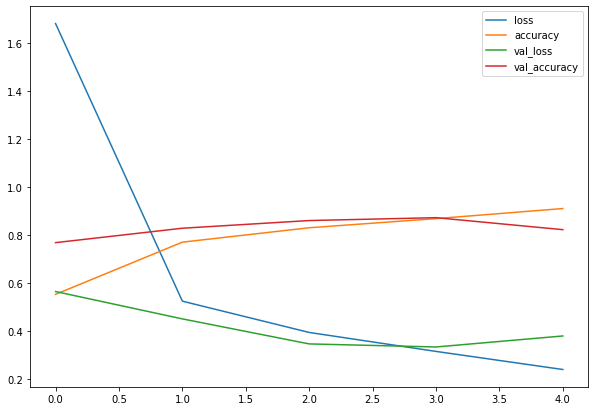

In [ ]:
# Let's plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7));

In [ ]:
# Plot the validation and training curves seperately
def plot_loss_curves(history):
  """
  Returns seperate loss curves for training and validation metrics.
  """

  loss=history.history["loss"]
  val_loss=history.history["val_loss"]

  accuracy=history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]

  epochs=range(len(history.history["loss"]))# how many epochs are there?

  #Plot loss
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

   #Plot accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

**Note** When a model's validation loss starts to increase, it's likely that the model is *overfitting* the training dataset. This means it's learning the patterns in the training dataset *too well* and thus the model's ability to generalize unseen data will be diminished.

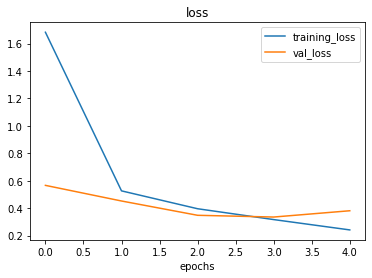

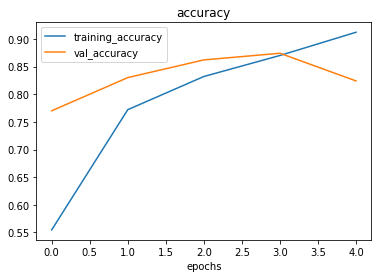

In [ ]:
# Check out the accuracy of model_4
plot_loss_curves(history_4)

Ideally te=he two curves above should look similar to each other, if there are large differeneces, there may be overfitting.

###6.Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfittinge 


Ways to induce overfitting:
* Increase the no. of conv layers
* Increase the no. of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layer(such as MaxPool2D)
* Add more data

>**Note:** Reducing overfitting is also known as **regularization**

In [ ]:
# Create the model (Our new baseline)
model_5=Sequential([
        Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
        MaxPool2D(pool_size=2),
        Conv2D(10,3,activation="relu"),
        MaxPool2D(),
        Conv2D(10,3,activation="relu"),
        MaxPool2D(),
        Flatten(),
        Dense(1,activation="sigmoid")
])

In [ ]:
#Compile the model
model_5.compile(
    loss="binary_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)

In [ ]:
# Fit the model
history_5=model_5.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 222ms/step - loss: 0.6334 - accuracy: 0.6207 - val_loss: 0.4518 - val_accuracy: 0.8140
Epoch 2/5
47/47 [==============================] - 10s 218ms/step - loss: 0.4594 - accuracy: 0.7900 - val_loss: 0.4150 - val_accuracy: 0.8180
Epoch 3/5
47/47 [==============================] - 10s 216ms/step - loss: 0.4150 - accuracy: 0.8227 - val_loss: 0.3275 - val_accuracy: 0.8640
Epoch 4/5
47/47 [==============================] - 10s 215ms/step - loss: 0.3865 - accuracy: 0.8340 - val_loss: 0.3365 - val_accuracy: 0.8400
Epoch 5/5
47/47 [==============================] - 10s 222ms/step - loss: 0.3880 - accuracy: 0.8367 - val_loss: 0.3382 - val_accuracy: 0.8340


In [ ]:
# Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

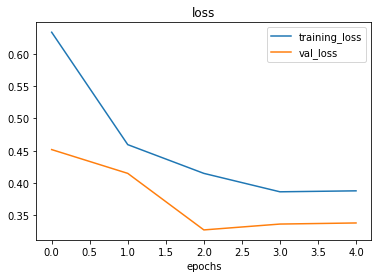

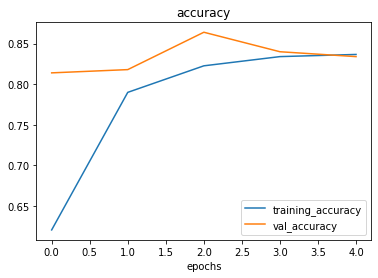

In [ ]:
plot_loss_curves(history_5)

In [ ]:
### Opening our bag of tricks and finding data augmentation

# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented=ImageDataGenerator(rescale=1./255,
                                          rotation_range=0.2, # How much do you want to rotate an image?
                                          shear_range=0.2, # How much do you want to shear an image?
                                          zoom_range=0.2, # zoom in randomly on an image
                                          width_shift_range=0.2,# Move your image around on x-axis
                                          height_shift_range=0.3,# Move your image around on y-axis
                                          horizontal_flip=True) # Do you want to flip an image?

# Create ImageDataGenerator without data augmentation
train_datagen=ImageDataGenerator(rescale=1./255)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen=ImageDataGenerator(rescale=1./255)


>> What is data augmentation?

This is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable(hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Let's write some code to visualise data augmentation.

In [ ]:
# Import data and augment it from training directory
print("Augmented training data:")
train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,
                                                                 target_size=(224,224),
                                                                 batch_size=32,
                                                                 class_mode="binary",
                                                                 shuffle=False)#For demonstration purposes only
#Create non-augmented train data batches
print ("Non-augmented training data:")
train_data=train_datagen.flow_from_directory(train_dir,
                                          target_size=(224,224),
                                          batch_size=32,
                                          class_mode="binary",
                                          shuffle=False)
#Create non-augmented test data batches
IMG_SIZE=(224,224)
print("Non-augmented test data")
test_data=test_datagen.flow_from_directory(test_dir,
                                           target_size=IMG_SIZE,
                                           batch_size=32,
                                           class_mode="binary")


Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data
Found 500 images belonging to 2 classes.


**Note**: Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they are loaded into the model.

Finally, let;s visualise some augmented data

In [ ]:
# Get sample augmented data batches
images,labels=train_data.next()
augmented_images, augmented_labels=train_data_augmented.next() # note: labels aren't augmented...only data

showing image number:12


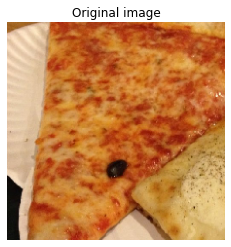

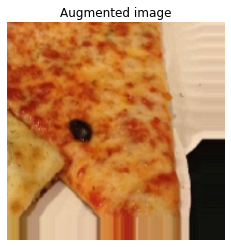

In [ ]:
# Show the original image and augmented image
import random
random_number=random.randint(0,32) # our batch sizes are 32..
print(f"showing image number:{random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);


Now that we seen what augmented training data looks like, let's build a model and see how it learns

In [ ]:
# Create a model that trains on augmented data(same as model 5)
model_6=Sequential([
                    Conv2D(10,3,activation="relu"),
                    MaxPool2D(pool_size=2),
                    Conv2D(10,3,activation="relu"),
                    MaxPool2D(),
                    Conv2D(10,3,activation="relu"),
                    MaxPool2D(),
                    Flatten(),
                    Dense(1,activation="sigmoid")
])

#Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])
#Fit the model
history_6=model_6.fit(train_data_augmented,
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 550ms/step - loss: 0.7221 - accuracy: 0.5233 - val_loss: 0.6952 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 25s 540ms/step - loss: 0.6990 - accuracy: 0.5173 - val_loss: 0.6818 - val_accuracy: 0.6760
Epoch 3/5
47/47 [==============================] - 25s 536ms/step - loss: 0.6816 - accuracy: 0.6207 - val_loss: 0.6352 - val_accuracy: 0.7760
Epoch 4/5
47/47 [==============================] - 25s 541ms/step - loss: 0.6556 - accuracy: 0.6573 - val_loss: 0.6084 - val_accuracy: 0.7180
Epoch 5/5
47/47 [==============================] - 25s 538ms/step - loss: 0.6459 - accuracy: 0.6440 - val_loss: 0.5201 - val_accuracy: 0.8100


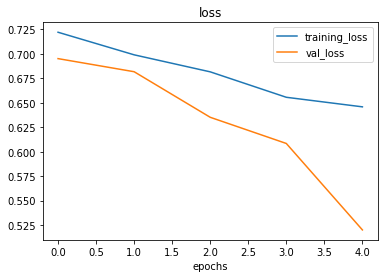

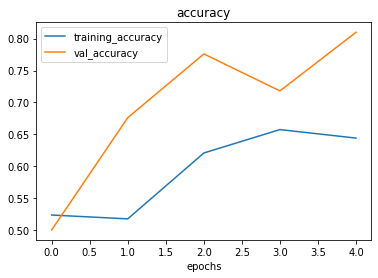

In [ ]:
# Check our model's training curves
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model the same as before and see what happens

In [ ]:
# Shuffle our data
print("Augmented training data:")
train_data_augmented_shuffled=train_datagen_augmented.flow_from_directory(train_dir,
                                                                 target_size=(224,224),
                                                                 batch_size=32,
                                                                 class_mode="binary",
                                                                 shuffle=True) # Shuffle data this time


Augmented training data:
Found 1500 images belonging to 2 classes.


In [ ]:
# Create the model(same as model_5 and model_6)
# Create a model that trains on augmented data(same as model 5)
model_7=Sequential([
                    Conv2D(10,3,activation="relu"),
                    MaxPool2D(),
                    Conv2D(10,3,activation="relu"),
                    MaxPool2D(),
                    Conv2D(10,3,activation="relu"),
                    MaxPool2D(),
                    Flatten(),
                    Dense(1,activation="sigmoid")
])

#Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])
#Fit the model
history_7=model_7.fit(train_data_augmented_shuffled, #we're fitting on augmented and shuffled data
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented_shuffled),
                      validation_data=test_data,
                      validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 26s 549ms/step - loss: 0.6507 - accuracy: 0.6047 - val_loss: 0.5283 - val_accuracy: 0.7120
Epoch 2/5
47/47 [==============================] - 25s 538ms/step - loss: 0.5434 - accuracy: 0.7393 - val_loss: 0.4339 - val_accuracy: 0.8080
Epoch 3/5
47/47 [==============================] - 25s 539ms/step - loss: 0.5165 - accuracy: 0.7487 - val_loss: 0.3870 - val_accuracy: 0.8260
Epoch 4/5
47/47 [==============================] - 25s 539ms/step - loss: 0.4984 - accuracy: 0.7613 - val_loss: 0.3889 - val_accuracy: 0.8260
Epoch 5/5
47/47 [==============================] - 25s 535ms/step - loss: 0.4850 - accuracy: 0.7747 - val_loss: 0.3186 - val_accuracy: 0.8660


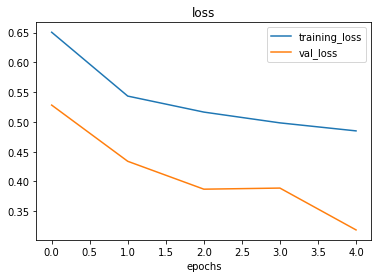

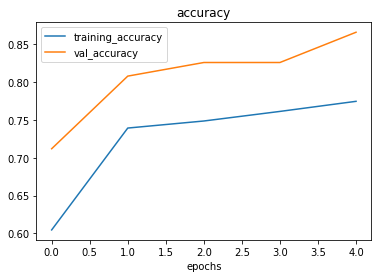

In [ ]:
# Plot the loss curves
plot_loss_curves(history_7)

**Note:** When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images(in our case, pizza & strak at the same time instead of just pizza then steak)

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers(e.g add more`Conv2D`/`MaxPool2D` layers)
* Increase the number of filters in each convolutionaka layer(e.g. from 10 to 32 or even 64)
* Train for longer(more epochs)
* Find an ideal learning rate
* Get more data ( give model more opportunites to learn)
* Use **transfer learning** to leverage what another image model has learned and adjust it for our own use case)

Practice recreating the model on the CNN website(same as model_1) and see how it performs with augmentes shuffled training data



In [ ]:
# Build a CNN model (Same as the Tiny VGG on the CNN explainer website)
model_1_shuffled=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(32,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(32,3,activation="relu"),
    tf.keras.layers.Conv2D(32,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])       

#Compile our CNN
model_1_shuffled.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
#Fit the model
history_1_shuffled=model_1_shuffled.fit(train_data_augmented_shuffled,
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented_shuffled),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 31s 617ms/step - loss: 0.6592 - accuracy: 0.6160 - val_loss: 0.5348 - val_accuracy: 0.7260
Epoch 2/5
47/47 [==============================] - 28s 586ms/step - loss: 0.5757 - accuracy: 0.6940 - val_loss: 0.4356 - val_accuracy: 0.8180
Epoch 3/5
47/47 [==============================] - 28s 591ms/step - loss: 0.5394 - accuracy: 0.7327 - val_loss: 0.4619 - val_accuracy: 0.7660
Epoch 4/5
47/47 [==============================] - 29s 605ms/step - loss: 0.5611 - accuracy: 0.7187 - val_loss: 0.4317 - val_accuracy: 0.8140
Epoch 5/5
47/47 [==============================] - 28s 600ms/step - loss: 0.5276 - accuracy: 0.7453 - val_loss: 0.4182 - val_accuracy: 0.8060


## Making a prediction with our trained model on our own custom data


In [ ]:
#Classes we're working with
print(class_names)

['pizza' 'steak']


--2022-03-15 18:39:43--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.03s   

2022-03-15 18:39:44 (71.1 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

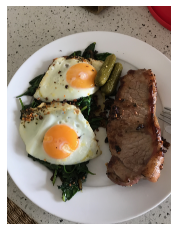

In [ ]:
# View our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak=mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [ ]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

In [ ]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 109],
        [142, 122,  98],
        [101,  80,  59],
        ...,
        [165, 154, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  95],
        [139, 117,  93],
        [106,  86,  62],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 127, 100],
        [149, 127, 103],
        [114,  94,  70],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [145, 132, 126]]

In [ ]:
expanded_steak=tf.expand_dims(steak,axis=0)

> **Note:** When you train a neural network and you want to make a prediction with it on your custom data, it's important that your custom data(new data) is preprocessed into the same format as the data your model was trained on.

In [ ]:
# Create a function to import an image and reshape it to be able to be used with our model
def load_and_prep_image(filename,img_shape=224):
  """ 

  Reads an image from filename, turns it into a tensor and reshapes it
  to (img_shape,img_shape,color_channels).
  """

  #Read in the image
  img=tf.io.read_file(filename)
  # Decode the read file into a tensor
  img=tf.image.decode_image(img)
  #Resize the image
  img=tf.image.resize(img,size=[img_shape,img_shape])
  #Rescale the image(get all values between 0 and 1)
  img=img/255
  return img



In [ ]:
#Load in and preprocess our custom image
steak=load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
pred=model_7.predict(tf.expand_dims(steak,axis=0))
pred

array([[0.81368953]], dtype=float32)

Looks like our custom image is being puth through our model,however,it currently ouputs a prediction probability. How about we visualize the image as well as the model's prediction?

In [ ]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
#We can index the predicted class by rounding the prediction probabilty and indexing it on the class names
pred_class=class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot (model,filename,class_names=class_names):
  """

  Imports an image located at filename,makes a prediction with model and plots the image with the predicted class as the title
  """
  
  #Import the target image and preprocess is
  img=load_and_prep_image(filename)

  #Make a prediction
  pred=model.predict(tf.expand_dims(img, axis=0))

  #Get the predicted class
  pred_class=class_names[int(tf.round(pred))]

  #Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction:{pred_class}")
  plt.axis(False);



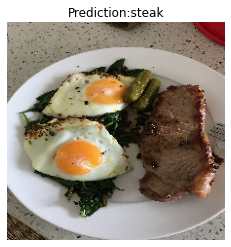

In [ ]:
# Test our model on a custom image
pred_and_plot(model_7,"03-steak.jpeg")

Our model works! Let;s try on another image...this time pizza

--2022-03-15 18:39:47--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.03s   

2022-03-15 18:39:47 (93.2 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



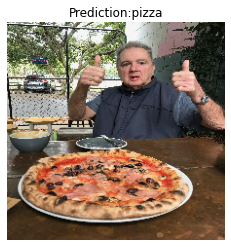

In [ ]:
# Download another test custom image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, "03-pizza-dad.jpeg")

/content/mypizzasample.jpg: Scheme missing.


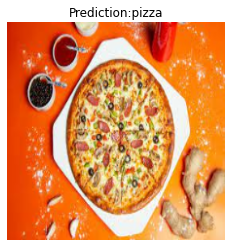

In [ ]:
!wget /content/mypizzasample.jpg
pred_and_plot(model_7,"mypizzasample.jpg")

# Multi-class Image Classification

We've just been through a bunch of the following steps with a binary classification problem(pizza vs steak), now we're going to step things a notch with 10 classes of food(multi-class classification)

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model(start witha baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat the baseline/reduce overfitiing)
7. Repeat until satisfied

In [ ]:
##1. Import and become one with the data
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

#Unzip our data
zip_ref=zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

--2022-03-15 18:40:18--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.140.128, 108.177.15.128, 173.194.76.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.140.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  88.2MB/s    in 5.9s    

2022-03-15 18:40:25 (83.6 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

#Walk through 10 classes of food image data
for dirpath,dirnames,filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 

In [ ]:
# setup the train and test directories
train_dir="10_food_classes_all_data/train/"
test_dir="10_food_classes_all_data/test/"

In [ ]:
# Let's get the class names
import pathlib
import numpy as np
data_dir=pathlib.Path(train_dir)
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)


['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['1489337.jpg']
Image shape: (512, 512, 3)


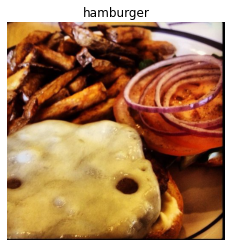

In [ ]:
# Visualize
import random 
img=view_random_image(target_dir=train_dir,
                      target_class=random.choice(class_names))


In [ ]:
random.choice(class_names)

'chicken_curry'

### 2. Preprocess the data (prepare it for a model)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#rescale
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

#Load data in from directories and turn it into batches
train_data=train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")
test_data=test_datagen.flow_from_directory(test_dir,
                                           target_size=(224,224),
                                           batch_size=32,
                                           class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model(start with a baseline)

Check out the CNN exolainer website. We'll recreate their model(On 10 classes)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense, Activation
from tensorflow.keras.optimizers import Adam
model_8=Sequential([
                    Conv2D(10,3, input_shape=(224,224,3)),
                    Activation(activation="relu"),
                    Conv2D(10,3,activation="relu"),
                    MaxPool2D(),
                    Conv2D(10,3,activation="relu"),
                    Conv2D(10,3,activation="relu"),
                    MaxPool2D(),
                    Flatten(),
                    Dense(10,activation="softmax") # Changed to have 10 ouput neurons and use the softmax activation
])

#Compile the model
model_8.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])


### Fit a model

In [ ]:
#Fit the model
history_8=model_8.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 56s 236ms/step - loss: 2.2660 - accuracy: 0.1401 - val_loss: 2.2006 - val_accuracy: 0.1860
Epoch 2/5
235/235 [==============================] - 55s 236ms/step - loss: 2.1194 - accuracy: 0.2436 - val_loss: 2.0397 - val_accuracy: 0.2784
Epoch 3/5
235/235 [==============================] - 56s 239ms/step - loss: 1.7552 - accuracy: 0.3972 - val_loss: 1.9555 - val_accuracy: 0.3276
Epoch 4/5
235/235 [==============================] - 57s 241ms/step - loss: 1.1190 - accuracy: 0.6280 - val_loss: 2.3741 - val_accuracy: 0.2916
Epoch 5/5
235/235 [==============================] - 57s 242ms/step - loss: 0.4792 - accuracy: 0.8524 - val_loss: 3.6485 - val_accuracy: 0.2484


### 5. Evaluating our Model

In [ ]:
# Evaluate on the test data
model_8.evaluate(test_data)

79/79 [==============================] - 13s 161ms/step - loss: 3.6485 - accuracy: 0.2484


[3.6484577655792236, 0.2484000027179718]

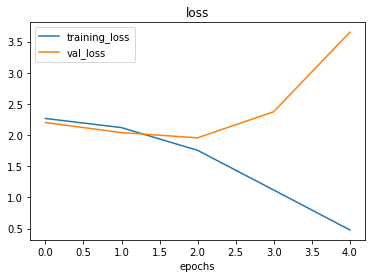

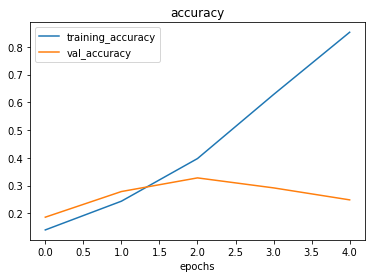

In [ ]:
# Check out the model's loss curves
plot_loss_curves(history_8)

What do these loss curves mean?

Our model is **overfitting** the training set quite badly(it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test dataset)

### 6. Adjust the model parameters to beat the baseline/reduce overfitting

Due to its performance on the training data, it's clear our model is learning something...


However, it is not generalizing well to unseen data(overfitting)

So, let's try and fix overfitting by..

* **Get more data** - having more data gives a model more opportunity to learn diverse patterns...
* ** Simplify the model**- if our current model is overfiiting the data, it may be too complicated of a model, one way to simplify model is to reduce no. of layers or no. of hidden units in layers
* **Data Augmentation**-data augmentation manipulates the training data in such a way to add more diversity to it (without altering the original data)
* **Use transfer learning**- transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset



How about we try and simplify the model first?

Let's try to remove 2 convolutional layers..

In [ ]:
model_8.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_21 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_23 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

In [ ]:
model_9=Sequential([
                    Conv2D(10,3, activation="relu",input_shape=(224,224,3)),
                    MaxPool2D(),
                    Conv2D(10,3,activation="relu"),
                    MaxPool2D(),
                    Flatten(),
                    Dense(10,activation="softmax") # Changed to have 10 ouput neurons and use the softmax activation
])

#Compile the model
model_9.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
model_9.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 29160)             0         
                                                                 
 dense_14 (Dense)            (None, 10)               

In [ ]:
# Fit the data with 2x con layers removed
history_9=model_9.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 60s 252ms/step - loss: 2.1669 - accuracy: 0.2401 - val_loss: 2.0063 - val_accuracy: 0.3000
Epoch 2/5
235/235 [==============================] - 56s 237ms/step - loss: 1.8295 - accuracy: 0.3692 - val_loss: 1.9887 - val_accuracy: 0.2916
Epoch 3/5
235/235 [==============================] - 57s 242ms/step - loss: 1.4754 - accuracy: 0.5140 - val_loss: 2.0864 - val_accuracy: 0.3012
Epoch 4/5
235/235 [==============================] - 52s 220ms/step - loss: 0.9766 - accuracy: 0.6872 - val_loss: 2.2683 - val_accuracy: 0.3068
Epoch 5/5
235/235 [==============================] - 64s 274ms/step - loss: 0.5606 - accuracy: 0.8355 - val_loss: 2.7361 - val_accuracy: 0.2984


In [ ]:
model_9.evaluate(test_data)

79/79 [==============================] - 17s 210ms/step - loss: 2.7361 - accuracy: 0.2984


[2.736109972000122, 0.29840001463890076]

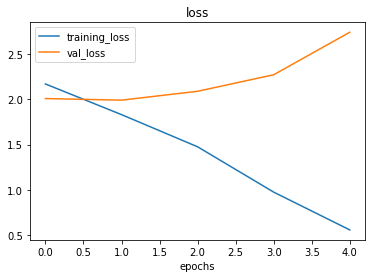

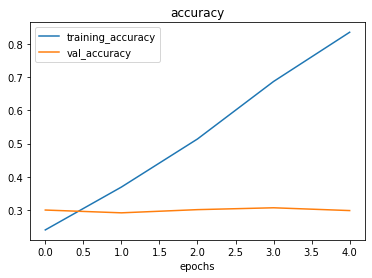

In [ ]:
plot_loss_curves(history_9)

Looks like "simplifying the model" did not work..the accuracy went down and overfitting continued. How about we try data augmentation?

### Trying to reduce overfitting with data augmentation

Let's try and improve our model's results by using augmented training data..

Ideally we want to:
* Reduce overfitting(get the train and validation loss curves closer)
* Improve validation accuracy

In [ ]:
# Creates an augmented data generator instance
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented=ImageDataGenerator(rescale=1./255,
                                          rotation_range=0.2, # How much do you want to rotate an image?
                                          zoom_range=0.2, # zoom in randomly on an image
                                          width_shift_range=0.2,# Move your image around on x-axis
                                          height_shift_range=0.2,# Move your image around on y-axis
                                          horizontal_flip=True) # Do you want to flip an image?

train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224,224),
                                                                  batch_size=32,
                                                                  class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [ ]:
# Let's create another model but fit it with the augmented data
model_10=tf.keras.models.clone_model(model_8)

# Compile the cloned model using the same setup as previous models
model_10.compile(loss="categorical_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])

In [ ]:
# Fit the model
history_10=model_10.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 162s 684ms/step - loss: 2.2581 - accuracy: 0.1673 - val_loss: 2.1416 - val_accuracy: 0.2072
Epoch 2/5
235/235 [==============================] - 149s 632ms/step - loss: 2.1371 - accuracy: 0.2257 - val_loss: 2.0274 - val_accuracy: 0.2844
Epoch 3/5
235/235 [==============================] - 156s 664ms/step - loss: 2.0849 - accuracy: 0.2608 - val_loss: 1.9938 - val_accuracy: 0.3048
Epoch 4/5
235/235 [==============================] - 146s 621ms/step - loss: 2.0494 - accuracy: 0.2745 - val_loss: 1.9770 - val_accuracy: 0.3128
Epoch 5/5
235/235 [==============================] - 154s 657ms/step - loss: 2.0055 - accuracy: 0.2984 - val_loss: 1.8283 - val_accuracy: 0.3560


In [ ]:
model_8.evaluate(test_data)

79/79 [==============================] - 22s 276ms/step - loss: 3.6485 - accuracy: 0.2484


[3.648458480834961, 0.2484000027179718]

In [ ]:
model_10.evaluate(test_data)

79/79 [==============================] - 22s 279ms/step - loss: 1.8283 - accuracy: 0.3560


[1.8282763957977295, 0.35600000619888306]

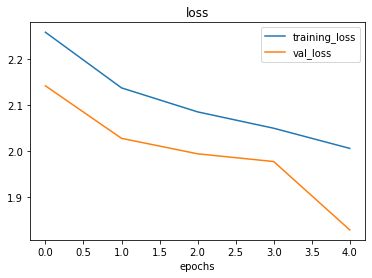

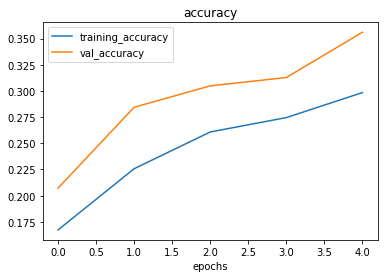

In [ ]:
# Check out our model trained on augmented data's loss curves
plot_loss_curves(history_10)

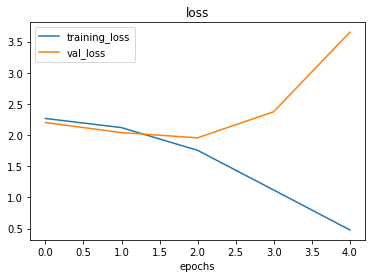

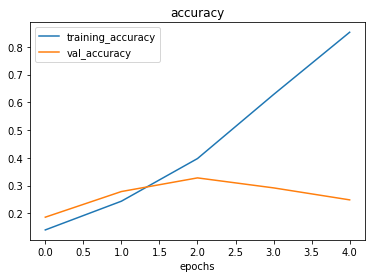

In [ ]:
plot_loss_curves(history_8)

The loss curves are much closer to each other than the baseline model and look like they're headed in the right direction

### 7. Repeat until satisfied

* Restructuring our model's architecture
* Adjust the learning rate
* Try different methods of data augmentation
* Fit on more data
* Training for longer
* Try **transfer learning**


### Making a prediction with our trained model


In [ ]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
# Download some custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget /content/mypizzasample.jpg

--2022-03-15 19:26:26--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3564285 (3.4M) [image/jpeg]
Saving to: ‘03-hamburger.jpeg.1’

03-hamburger.jpeg.1 100%[===================>]   3.40M  --.-KB/s    in 0.04s   

2022-03-15 19:26:26 (95.6 MB/s) - ‘03-hamburger.jpeg.1’ saved [3564285/3564285]

--2022-03-15 19:26:26--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awai

In [ ]:
# Reconfig pred_and_plot function to work with multi-class images
def pred_and_plot (model,filename,class_names=class_names):
  """

  Imports an image located at filename,makes a prediction with model and plots the image with the predicted class as the title
  """
  
  #Import the target image and preprocess is
  img=load_and_prep_image(filename)

  #Make a prediction
  pred=model.predict(tf.expand_dims(img, axis=0))
 
 # Add in logic for multi-class and get pred_class name
  if len(pred[0])>1:
    pred_class=class_names[tf.argmax(pred[0])]
  else:
    pred_class=class_names[int(tf.round(pred))]

 

  #Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction:{pred_class}")
  plt.axis(False);


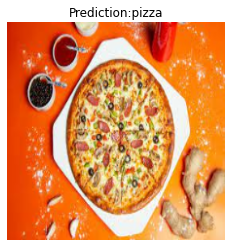

In [ ]:
# Make a prediction using model_10
pred_and_plot(model=model_10,
              filename="mypizzasample.jpg",
              class_names=class_names)

Looks like our model didn't work very well on our custom images

###Saving and loading our model

In [ ]:
# Save a model
model_10.save("save_trained_model_10")

INFO:tensorflow:Assets written to: save_trained_model_10/assets


In [ ]:
#Load in a trained model and evaluate it
loaded_model_10=tf.keras.models.load_model("save_trained_model_10")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 15s 184ms/step - loss: 1.8283 - accuracy: 0.3560


[1.8282767534255981, 0.35600000619888306]